In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import time

In [4]:
df = pd.read_csv('./titanic/train.csv')

### Data Processing

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)

In [7]:
df['Embarked'].isna().sum()

2

In [8]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
df['Embarked'].fillna('S', inplace=True)

C:\Users\patel\AppData\Local\Temp\ipykernel_25456\448288291.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Label Encoding the Data

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
unique_op_sex = df['Sex'].unique()
print("Label Encoder Parameters Sex", le_sex.inverse_transform(unique_op_sex))

le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])
unique_op_embarked = df['Embarked'].unique()
print("Label Encoder Parameters Embarked", le_embarked.inverse_transform(unique_op_embarked))

Label Encoder Parameters Sex ['male' 'female']
Label Encoder Parameters Embarked ['S' 'C' 'Q']


In [13]:
le_embarked.classes_

array(['C', 'Q', 'S'], dtype=object)

In [14]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
5,6,0,3,1,NaN,0,0,8.4583,1
6,7,0,1,1,54.0,0,0,51.8625,2
7,8,0,3,1,2.0,3,1,21.0750,2
8,9,1,3,0,27.0,0,2,11.1333,2
9,10,1,2,0,14.0,1,0,30.0708,0


#### Imputing the Data

In [15]:
from sklearn.impute import KNNImputer

In [16]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0


In [17]:
imputer = KNNImputer(n_neighbors=3)
df.loc[:, 'Pclass':] = imputer.fit_transform(df.loc[:, 'Pclass':])

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,30.054407,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.769689,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.833333,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [19]:
gc.collect()

0

### Training the Model and Hyperparameter Tuning

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df.loc[:, 'Survived'])

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

In [23]:
dtc_default = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

In [24]:
dtc_default.fit(X=train.loc[:, 'Pclass':], y=train.loc[:, 'Survived'])

DecisionTreeClassifier(random_state=42)

In [25]:
print("Training Accuracy", accuracy_score(y_true=train.loc[:, 'Survived'], y_pred=dtc_default.predict(X=train.loc[:, 'Pclass':])))
print("Testing Accuracy ", accuracy_score(y_true=test.loc[:, 'Survived'], y_pred=dtc_default.predict(X=test.loc[:, 'Pclass':])))

Training Accuracy 0.9831460674157303
Testing Accuracy  0.7988826815642458


In [26]:
print("Training F1", f1_score(y_true=train.loc[:, 'Survived'], y_pred=dtc_default.predict(X=train.loc[:, 'Pclass':])))
print("Testing F1 ", f1_score(y_true=test.loc[:, 'Survived'], y_pred=dtc_default.predict(X=test.loc[:, 'Pclass':])))

Training F1 0.9776119402985075
Testing F1  0.7272727272727273


In [27]:
dtc_entropy = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

In [28]:
dtc_entropy.fit(X=train.loc[:, 'Pclass':], y=train.loc[:, 'Survived'])

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [29]:
print("Training Accuracy", accuracy_score(y_true=train.loc[:, 'Survived'], y_pred=dtc_entropy.predict(X=train.loc[:, 'Pclass':])))
print("Testing Accuracy ", accuracy_score(y_true=test.loc[:, 'Survived'], y_pred=dtc_entropy.predict(X=test.loc[:, 'Pclass':])))

Training Accuracy 0.9831460674157303
Testing Accuracy  0.7821229050279329


In [30]:
print("Training F1", f1_score(y_true=train.loc[:, 'Survived'], y_pred=dtc_entropy.predict(X=train.loc[:, 'Pclass':])))
print("Testing F1 ", f1_score(y_true=test.loc[:, 'Survived'], y_pred=dtc_entropy.predict(X=test.loc[:, 'Pclass':])))

Training F1 0.9776119402985075
Testing F1  0.706766917293233


In [31]:
print(f'Tree Depth {dtc_entropy.get_depth()}, Number of Leaves {dtc_entropy.get_n_leaves()}')

Tree Depth 20, Number of Leaves 158


In [32]:
dtc_depth = DecisionTreeClassifier(
    criterion='gini',
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

In [33]:
dtc_depth.fit(X=train.loc[:, 'Pclass':], y=train.loc[:, 'Survived'])

DecisionTreeClassifier(max_depth=17, random_state=42)

In [34]:
print("Training Accuracy", accuracy_score(y_true=train.loc[:, 'Survived'], y_pred=dtc_depth.predict(X=train.loc[:, 'Pclass':])))
print("Testing Accuracy ", accuracy_score(y_true=test.loc[:, 'Survived'], y_pred=dtc_depth.predict(X=test.loc[:, 'Pclass':])))

Training Accuracy 0.9789325842696629
Testing Accuracy  0.8044692737430168


In [35]:
print("Training F1", f1_score(y_true=train.loc[:, 'Survived'], y_pred=dtc_depth.predict(X=train.loc[:, 'Pclass':])))
print("Testing F1 ", f1_score(y_true=test.loc[:, 'Survived'], y_pred=dtc_depth.predict(X=test.loc[:, 'Pclass':])))

Training F1 0.9719626168224299
Testing F1  0.732824427480916


In [36]:
dtc_max_leaves = DecisionTreeClassifier(
    criterion='gini',
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=150,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

In [37]:
dtc_max_leaves.fit(X=train.loc[:, 'Pclass':], y=train.loc[:, 'Survived'])

DecisionTreeClassifier(max_depth=17, max_leaf_nodes=150, random_state=42)

In [38]:
print("Training Accuracy", accuracy_score(y_true=train.loc[:, 'Survived'], y_pred=dtc_max_leaves.predict(X=train.loc[:, 'Pclass':])))
print("Testing Accuracy ", accuracy_score(y_true=test.loc[:, 'Survived'], y_pred=dtc_max_leaves.predict(X=test.loc[:, 'Pclass':])))

Training Accuracy 0.9789325842696629
Testing Accuracy  0.8044692737430168


In [39]:
print("Training F1", f1_score(y_true=train.loc[:, 'Survived'], y_pred=dtc_max_leaves.predict(X=train.loc[:, 'Pclass':])))
print("Testing F1 ", f1_score(y_true=test.loc[:, 'Survived'], y_pred=dtc_max_leaves.predict(X=test.loc[:, 'Pclass':])))

Training F1 0.9719626168224299
Testing F1  0.7445255474452555


In [40]:
dtc_max_features = DecisionTreeClassifier(
    criterion='gini',
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=150,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

In [41]:
dtc_max_features.fit(X=train.loc[:, 'Pclass':], y=train.loc[:, 'Survived'])

DecisionTreeClassifier(max_depth=17, max_leaf_nodes=150, random_state=42)

In [42]:
print("Training Accuracy", accuracy_score(y_true=train.loc[:, 'Survived'], y_pred=dtc_max_features.predict(X=train.loc[:, 'Pclass':])))
print("Testing Accuracy ", accuracy_score(y_true=test.loc[:, 'Survived'], y_pred=dtc_max_features.predict(X=test.loc[:, 'Pclass':])))

Training Accuracy 0.9789325842696629
Testing Accuracy  0.8044692737430168


In [43]:
print("Training F1", f1_score(y_true=train.loc[:, 'Survived'], y_pred=dtc_max_features.predict(X=train.loc[:, 'Pclass':])))
print("Testing F1 ", f1_score(y_true=test.loc[:, 'Survived'], y_pred=dtc_max_features.predict(X=test.loc[:, 'Pclass':])))

Training F1 0.9719626168224299
Testing F1  0.7445255474452555


In [44]:
from sklearn.tree import plot_tree

In [45]:
dtc_plot = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=150,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

In [46]:
dtc_plot.fit(X=train.loc[:, 'Pclass':], y=train.loc[:, 'Survived'])

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=150, random_state=42)

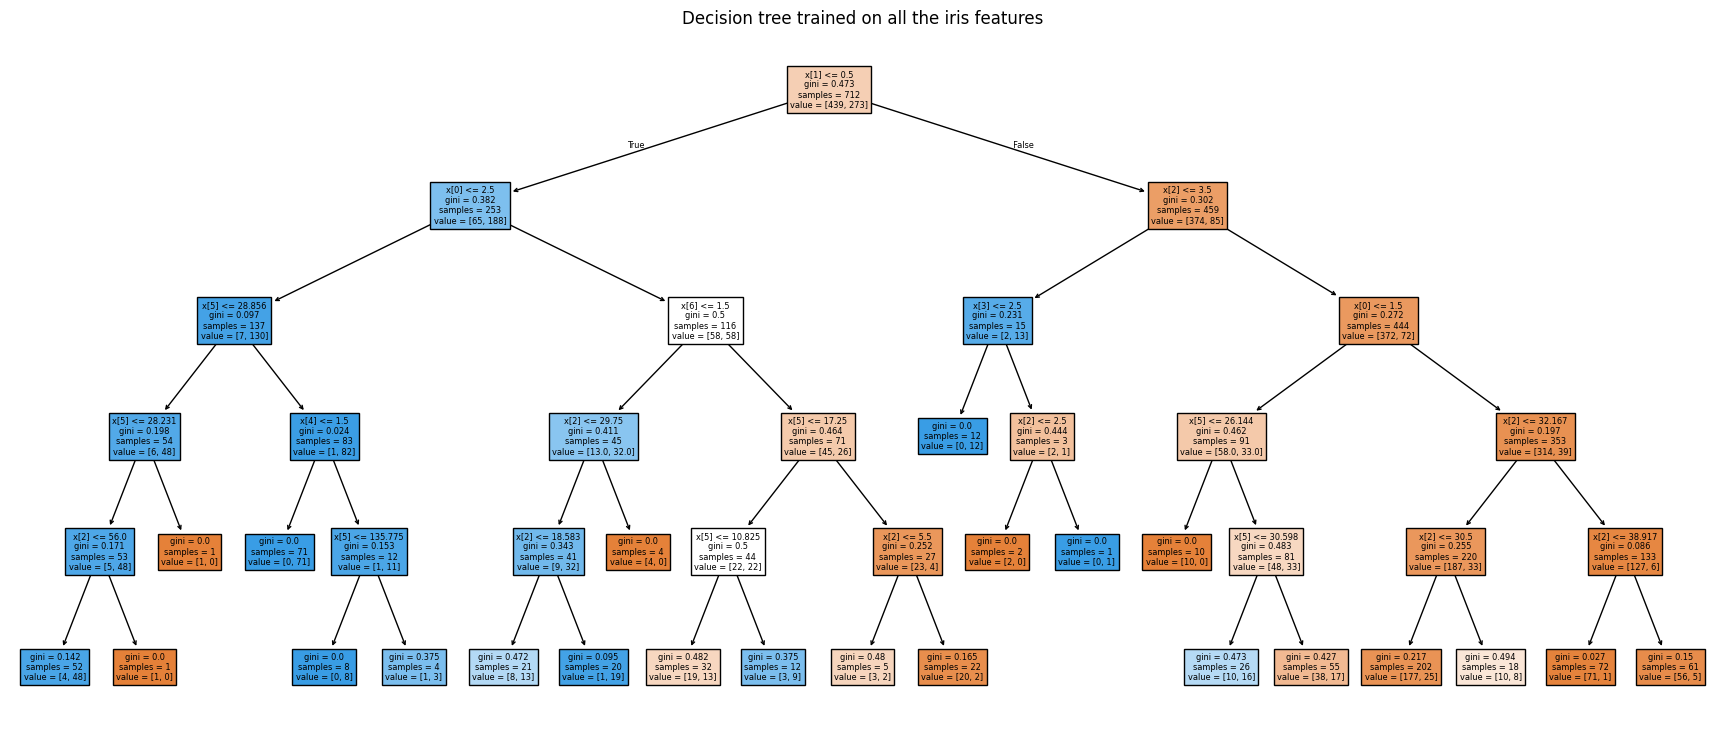

In [47]:
plt.figure(figsize=(22, 9))
plot_tree(dtc_plot, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()